#### Libraries

In [15]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

import yfinance as yfinance
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Loading Data

In [5]:
stock_data = yfinance.download('AAPL', start='2023-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.768463,129.537788,122.877827,128.924245,112117500
2023-01-04,125.045044,127.321112,123.778365,125.569527,89113600
2023-01-05,123.718987,126.440369,123.461698,125.807030,80962700
2023-01-06,128.271088,128.934113,123.590315,124.698663,87754700
2023-01-09,128.795578,132.021662,128.538289,129.112255,70790800


### Moving Average

In [6]:
window_size = 20

#### Simple Moving Average ( SMA )

In [7]:
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean()

#### Weighted Moving Average ( WMA )

In [8]:
weights = np.arange(1, window_size + 1)
stock_data['WMA'] = stock_data['Close'].rolling(window=window_size).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

#### Exponential Moving Average ( EWMA )

In [9]:
stock_data['EMA'] = stock_data['Close'].ewm(span=window_size).mean()

#### Plotting

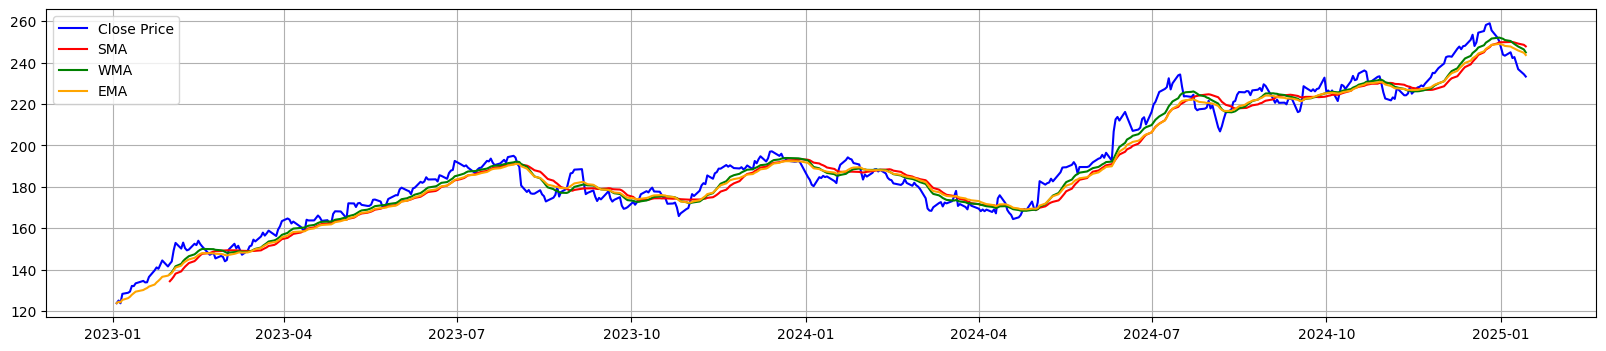

In [12]:
plt.figure(figsize=(20,4))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['SMA'], label='SMA', color='red')
plt.plot(stock_data['WMA'], label='WMA', color='green')
plt.plot(stock_data['EMA'], label='EMA', color='orange')
plt.legend()
plt.grid()
plt.show()

### Exponential Smoothing

#### Simple Exponential Smoothing

In [ ]:
ses_model = SimpleExpSmoothing(stock_data['Close']).fit(smoothing_level=0.7)
stock_data['SES'] = ses_model.fittedvalues

#### Double Exponential Smoothing

In [ ]:
des_model = ExponentialSmoothing(stock_data['Close'], trend='add').fit(smoothing_level=0.7)
stock_data['DES'] = des_model.fittedvalues

#### Triple Exponential Smoothing

In [19]:
tes_model = ExponentialSmoothing(stock_data['Close'], trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.7)
stock_data['TES'] = tes_model.fittedvalues

#### Plotting

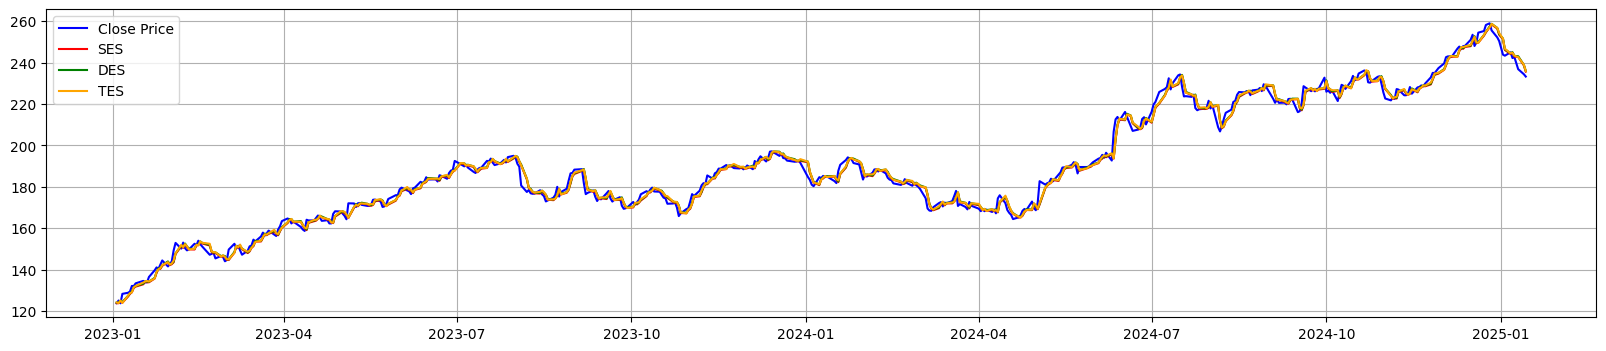

In [20]:
plt.figure(figsize=(20,4))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['SES'], label='SES', color='red')
plt.plot(stock_data['DES'], label='DES', color='green')
plt.plot(stock_data['TES'], label='TES', color='orange')
plt.legend()
plt.grid()
plt.show()